# Sayı Tanıma
Bu notebookta mnist veri seti üzerinden bir sınıflandırma problemi çözeceğiz. Veri seti $0-9$ arasındaki sayıların el ile yazılmasından oluşur. Her sayı $28x28$ boyutunda pikselden oluşur. Veri setinde toplamda $70.000$ görüntüden oluşur, bu çalışma için $42.000$ tanesi eğitim için kalan $28.000$ tanesi de test için ayrılmıştır.

In [1]:
# gerekli kütüphaneler
import numpy as np  # sayısal işlemler 
import pandas as pd  # veri manipülasyonu 
import seaborn as sns  # görselleştirme
import matplotlib.pyplot as plt  # görselleştirme

# görsel çıktılardaki uyarı mesajları için
import warnings 
warnings.filterwarnings('ignore')

In [144]:
veri = pd.read_csv('train.csv')

In [3]:
veri.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
veri['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [5]:
veri.shape

(42000, 785)

Veri seti $42.000$ satır ve $785$ sütundan oluşmakta. Label sütunu el yazısı rakamın hangisi olduğunu belirtir. pixel0-pixel783'e kadar giden sütunlar ise sırasıyla her bir pikseldeki yoğunluğu belirtir.

In [10]:
veri.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

Veri setindeki tüm değerler sayısaldır (int64).

### Veri setindeki rakamların dağılımı 

Dağılıma baktığımız zaman veri setinin oldukça dengeli olduğu söylenebilir.

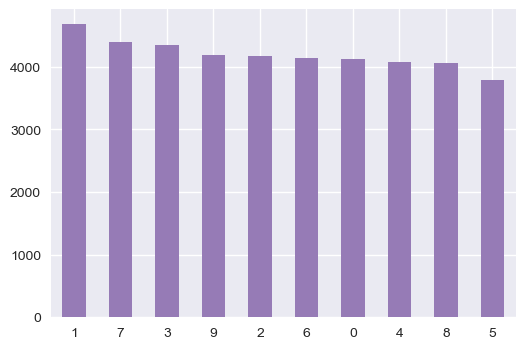

In [43]:
plt.style.use('seaborn')
plt.figure(figsize=(6,4)) 
veri['label'].value_counts().plot(kind='bar', color = '#967bb6')
plt.xticks(rotation=0)
plt.show()

### Veri setindeki sayılara görsel olarak bakalım

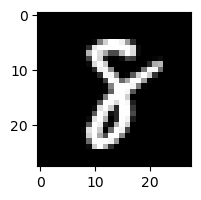

In [45]:
plt.style.use('default')
def print_image(index):
    some_digit = veri.iloc[index,1:].values
    some_digit_img = some_digit.reshape(28,28)
    plt.figure(figsize=(2,2))
    plt.imshow(some_digit_img, cmap = 'gray')
    
print_image(300)

In [145]:
X, y = veri.drop(['label'], axis = 1).values, veri['label']

In [79]:
X.shape

(42000, 784)

In [146]:
num_train = 38000
X_train, X_test, y_train, y_test = X[:num_train], X[num_train:], y[:num_train], y[num_train:]

In [147]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (38000, 784)
Shape of y_train: (38000,)
Shape of X_test: (4000, 784)
Shape of y_test: (4000,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
X_test.shape

(4000, 784)

In [ ]:
tahmin = knn.predict(X_test)
print(tahmin)

[5 7 5 ... 7 6 9]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, tahmin)

0.969

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, tahmin)

array([[428,   0,   0,   0,   0,   1,   1,   0,   0,   0],
       [  0, 442,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   3, 353,   1,   0,   0,   0,  11,   0,   1],
       [  1,   0,   2, 411,   0,   4,   0,   1,   1,   1],
       [  0,   3,   0,   0, 409,   0,   2,   0,   1,   7],
       [  1,   1,   0,   3,   0, 320,   4,   0,   2,   3],
       [  0,   0,   0,   0,   1,   1, 398,   0,   0,   0],
       [  0,   3,   2,   0,   1,   0,   0, 390,   0,   5],
       [  2,  16,   1,   5,   2,   5,   0,   1, 343,   4],
       [  1,   1,   2,   1,   4,   2,   0,   5,   1, 382]], dtype=int64)

## K Neighbors Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test,y_pred_knn)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(cm_knn, '\n--------------------------\n', 'KNN Accuracy Score: ', knn_accuracy)

[[427   0   0   0   0   1   2   0   0   0]
 [  0 440   0   0   0   0   1   1   0   0]
 [  4   1 353   1   1   0   0  10   1   1]
 [  1   0   3 405   0   7   0   1   3   1]
 [  0   1   0   0 414   0   2   1   0   4]
 [  0   1   0   2   0 328   1   0   0   2]
 [  2   0   0   0   1   2 395   0   0   0]
 [  0   2   3   1   2   0   0 390   0   3]
 [  1  13   1   3   2   5   2   1 346   5]
 [  3   0   1   0   8   2   0   5   0 380]] 
--------------------------
 KNN Accuracy Score:  0.9695


## Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred_logr = logr.predict(X_test)
cm_logr = confusion_matrix(y_test,y_pred_logr)
logr_accuracy = accuracy_score(y_test, y_pred_logr)
print(cm_logr, '\n--------------------------\n', 'Logistic Regression Accuracy Score: ', logr_accuracy)

[[416   0   2   1   1   1   4   1   4   0]
 [  0 429   1   2   1   1   1   0   4   3]
 [  4   3 328   7   1   1   5   4  17   2]
 [  1   0  10 386   0  10   3   3   5   3]
 [  3   2   6   1 388   2   4   1   6   9]
 [  6   3   6  11   5 278   3   1  16   5]
 [  3   0   1   0   1   1 393   0   1   0]
 [  1   0   8   1   5   1   0 375   0  10]
 [  3  13   7  10   2  10   4   0 327   3]
 [  2   0   3   7  12   5   0  17   4 349]] 
--------------------------
 Logistic Regression Accuracy Score:  0.91725


## Support Vector Machine

In [66]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
cm_svc = confusion_matrix(y_test,y_pred_svc)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(cm_svc, '\n--------------------------\n', 'Support Vector Classifier Accuracy Score: ', svc_accuracy)

[[424   0   0   0   0   0   3   1   2   0]
 [  0 437   0   0   1   1   0   0   2   1]
 [  1   0 365   1   0   0   0   2   2   1]
 [  1   0   4 409   0   3   0   1   1   2]
 [  0   1   1   0 409   0   3   0   2   6]
 [  1   1   0   4   1 319   2   0   4   2]
 [  1   0   0   0   1   0 398   0   0   0]
 [  0   0   4   0   1   1   0 393   1   1]
 [  1   4   2   4   1   1   2   0 364   0]
 [  1   0   1   2   6   0   0   5   2 382]] 
--------------------------
 Support Vector Classifier Accuracy Score:  0.975


## Naive Bayes

In [177]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
cm_gnb = confusion_matrix(y_test,y_pred_gnb)
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print(cm_gnb, '\n--------------------------\n', 'Naive Bayes Accuracy Score: ', gnb_accuracy)

[[368   1   2   2   0   0  28   0  21   8]
 [  0 418   1   3   0   2   4   0  10   4]
 [ 29  12  83  40   1   1 102   2  99   3]
 [  9  26   4 165   0   0  27   4 153  33]
 [  5   3   3   4  57   3  52   3  92 200]
 [ 19  11   1  10   0  15  30   0 220  28]
 [  1   4   1   0   0   0 387   0   7   0]
 [  1   2   0   4   3   0   2 150  15 224]
 [  4  69   2   5   0   1  10   1 226  61]
 [  2   7   0   2   4   1   1   4   7 371]] 
--------------------------
 Naive Bayes Accuracy Score:  0.56


## Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
dtc_accuracy = accuracy_score(y_test, y_pred_dtc)
print(cm_dtc, '\n--------------------------\n', 'Decision Tree Accuracy Score: ', dtc_accuracy)

[[393   0   8   4   2   8   9   1   5   0]
 [  1 420   2   1   1   4   0   3   7   3]
 [  6   4 315   7   4  10   1  11  10   4]
 [  3   2  11 356   4  14   7   8  13   3]
 [  0   1   5   1 359   7  11   6  13  19]
 [  9   1   4  10   2 267  13   2  14  12]
 [  1   4  14   1   6   6 359   2   6   1]
 [  1   2   6   1   4   2   1 373   3   8]
 [  1  11  11   8   3   5   6   1 318  15]
 [  2   1   5   6  13  12   3  10  16 331]] 
--------------------------
 Decision Tree Accuracy Score:  0.87275


## Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print(cm_rfc, '\n--------------------------\n', 'Random Forest Accuracy Score: ', rfc_accuracy)

[[421   0   0   0   1   1   3   0   4   0]
 [  0 437   0   1   0   2   0   1   1   0]
 [  5   0 353   2   0   1   1   1   7   2]
 [  0   0   5 403   0   2   1   2   5   3]
 [  0   1   0   0 411   0   2   0   1   7]
 [  2   0   0   3   1 318   3   0   5   2]
 [  1   0   0   0   3   1 395   0   0   0]
 [  0   0   4   0   2   0   0 385   2   8]
 [  0   8   1   2   0   0   2   1 361   4]
 [  3   1   3   6   3   0   1   5   2 375]] 
--------------------------
 Random Forest Accuracy Score:  0.96475


## XGBoost

In [72]:
import xgboost as xgb
xgb = xgb.XGBClassifier(objective='multiclass:softmax', num_class=3)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(cm_xgb, '\n--------------------------\n', 'XGB Accuracy Score: ', xgb_accuracy)

[[424   0   0   1   1   0   2   0   2   0]
 [  1 436   0   2   0   0   1   0   2   0]
 [  2   0 359   4   0   0   1   1   3   2]
 [  1   1   2 410   0   1   0   1   2   3]
 [  1   1   0   0 411   0   1   0   1   7]
 [  1   1   1   2   1 319   1   0   6   2]
 [  1   0   0   0   2   1 396   0   0   0]
 [  0   0   5   0   0   0   0 392   1   3]
 [  0   5   1   3   0   0   2   1 366   1]
 [  0   0   1   2   5   0   0   3   3 385]] 
--------------------------
 XGB Accuracy Score:  0.9745


## Neural Network

In [171]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

y_train = to_categorical(y_train)

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=0, callbacks=[early_stopping])

In [172]:
y_test = to_categorical(y_test)
model.evaluate(X_test, y_test)

125/125 [==============================] - 0s 729us/step - loss: 0.2477 - accuracy: 0.9308


[0.24765749275684357, 0.9307500123977661]

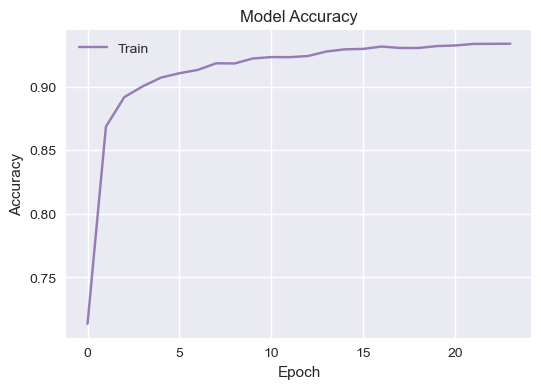

In [173]:
plt.style.use('seaborn')
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], color = '#967bb6')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [197]:
test = pd.read_csv('test.csv')

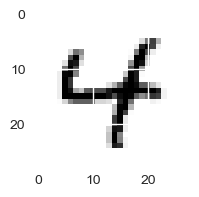

In [202]:
def print_testimage(index):
    some_digit = test.iloc[index].values
    some_digit_img = some_digit.reshape(28,28)
    plt.figure(figsize=(2,2))
    plt.imshow(some_digit_img,'binary')
    
print_testimage(480)

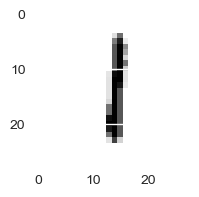

In [208]:
print_testimage(200)

In [206]:
testdata2 = dtc.predict(test)
testdata2

array([2, 0, 5, ..., 3, 9, 2], dtype=int64)

In [209]:
# DecisionTree
testdata2[200]

1